In [1]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ruptures as rpt

In [2]:
# Set display options to show more rows and columns
pd.set_option('display.max_rows', None)  # To show all rows
pd.set_option('display.max_columns', None)  # To show all columns
pd.set_option('display.width', None)  # To adjust the display width

In [3]:
def getValues1(tagList):
    url = "https://exactspace.co/kairosapi/api/v1/datapoints/query"
    d = {
        "metrics": [
            {
                "tags": {},
                "name": "",
                "aggregators": [
                    {
                        "name": "avg",
                        "sampling": {
                            "value": "1",
                            "unit": "minutes"
                        }
                    }
                ]
            }
        ],
        "plugins": [],
        "cache_time": 0,
        "cache_time": 0,
        "start_relative": {
        "value": "1",
        "unit": "days"
      }
    }
    finalDF = pd.DataFrame()
    for tag in tagList:
        d['metrics'][0]['name'] = tag
        res = requests.post(url=url, json=d)
        values = json.loads(res.content)
        df = pd.DataFrame(values["queries"][0]["results"][0]['values'], columns=['time', values["queries"][0]["results"][0]['name']])
        finalDF = pd.concat([finalDF, df], axis=1)

    finalDF = finalDF.loc[:, ~finalDF.columns.duplicated()]
    finalDF.dropna(subset=['time'], inplace=True)
    finalDF['time'] = pd.to_datetime(finalDF['time'], unit='ms').dt.strftime('%d-%m-%y %H:%M')

    return finalDF

In [4]:
tags= [
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric',
    'GAP_GAP03.PLC03.SCHENCK2_FEED_RATE',
    'GAP_9dfb_BallMill_Total_Power',       # Ball mill Tags
    'GAP_GAP01.PLC01._362_E200_JIT_01.PV',
    'GAP_GAP01.PLC01._362_E310_FIT_01.PV',
    'GAP_GAP01.PLC01._362_E200_ST_01.PV', # Mixer Tags
    'GAP_GAP04.PLC04.Power_M1',
    'GAP_GAP04.PLC04.Power_M2',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Height',
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Height',
    'GAP_GAP01.PLC01._362_E290_LIT_01.PV', #Fines silo level
    'GAP_GAP01.PLC01._362_E090_LIT_01.PV', #Grains silo level
    'GAP_GAP04.PLC04.K363_K180_PIT_01_PV', #Hydraulic pressure
    'GAP_GAP04.PLC04.K050_PIT_01_PV', #Mould 2 clamping pressure
    'GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power', #mixer power
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight', # anode m1 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight', # anode m2 weight
    'GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density',
    'GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density',
    'GAP_GAP01.PLC01._362_E020_VT_01.PV',
    'GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF',
    'GAP_GAP01.PLC01._362_E015_LIT_01.PV' #rhodax tags
]

In [5]:
raw_data=getValues1(tags)

In [6]:
raw_data.head()

,time,GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric,GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric,GAP_GAP03.PLC03.SCHENCK2_FEED_RATE,GAP_9dfb_BallMill_Total_Power,GAP_GAP01.PLC01._362_E200_JIT_01.PV,GAP_GAP01.PLC01._362_E310_FIT_01.PV,GAP_GAP01.PLC01._362_E200_ST_01.PV,GAP_GAP04.PLC04.Power_M1,GAP_GAP04.PLC04.Power_M2,GAP_GAP04.PLC04.MLD1_DATA_Anode_Height,GAP_GAP04.PLC04.MLD2_DATA_Anode_Height,GAP_GAP01.PLC01._362_E290_LIT_01.PV,GAP_GAP01.PLC01._362_E090_LIT_01.PV,GAP_GAP04.PLC04.K363_K180_PIT_01_PV,GAP_GAP04.PLC04.K050_PIT_01_PV,GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power,GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density,GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density,GAP_GAP01.PLC01._362_E020_VT_01.PV,GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF,GAP_GAP01.PLC01._362_E015_LIT_01.PV
0,19-10-23 08:23,1.663980,1.65382,5798.713380,21.0479,20.798840,0.014500,100.224085,35.546940,33.322290,684.144207,676.79529,35.659927,70.144390,194.870727,54.371400,113.40186,1065.50146,1066.59167,1.442670,1.433860,18.962730,52.0,81.897420
1,19-10-23 08:24,1.664305,1.65540,5772.565753,20.4408,21.047930,1.273915,100.038923,35.262940,33.322290,686.223450,676.79529,37.162535,71.491935,224.119953,182.298415,110.93197,1077.64038,1068.74255,1.442670,1.435233,19.421615,52.0,71.089130
2,19-10-23 08:27,1.664630,1.65619,5768.100585,20.8165,20.440800,0.111767,100.102390,35.262940,33.322290,686.223450,676.79529,39.764380,73.018100,224.634845,247.121700,110.93197,1077.64038,1070.89343,1.443230,1.435920,21.625970,52.0,58.474955
3,19-10-23 08:27,1.664630,1.65619,5751.693360,20.4879,20.896000,0.300470,100.026490,35.262940,33.440625,678.714170,679.06628,41.146923,71.947660,208.251767,292.323670,110.93197,1077.64038,1070.89343,1.443230,1.435920,13.369625,52.0,61.355530
4,19-10-23 08:28,1.664363,1.65619,5736.537595,20.4090,20.579775,0.632775,100.055277,34.884275,33.558960,678.714170,679.06628,42.396645,61.649557,197.833343,117.485613,110.93197,1077.64038,1062.64355,1.442885,1.437370,10.116090,52.0,46.374410


In [7]:
data = raw_data.copy()

In [8]:
data.shape

(1218, 24)

In [9]:
data=data[(data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']>=5500) & (data['GAP_GAP03.PLC03.SCHENCK2_FEED_RATE']<6400)]

In [10]:
data.shape

(485, 24)

In [11]:
data.head()

,time,GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric,GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric,GAP_GAP03.PLC03.SCHENCK2_FEED_RATE,GAP_9dfb_BallMill_Total_Power,GAP_GAP01.PLC01._362_E200_JIT_01.PV,GAP_GAP01.PLC01._362_E310_FIT_01.PV,GAP_GAP01.PLC01._362_E200_ST_01.PV,GAP_GAP04.PLC04.Power_M1,GAP_GAP04.PLC04.Power_M2,GAP_GAP04.PLC04.MLD1_DATA_Anode_Height,GAP_GAP04.PLC04.MLD2_DATA_Anode_Height,GAP_GAP01.PLC01._362_E290_LIT_01.PV,GAP_GAP01.PLC01._362_E090_LIT_01.PV,GAP_GAP04.PLC04.K363_K180_PIT_01_PV,GAP_GAP04.PLC04.K050_PIT_01_PV,GAP_GAP04.PLC04.MLD1_DATA_Mixer_Total_Power,GAP_GAP04.PLC04.MLD1_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Weight,GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density,GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density,GAP_GAP01.PLC01._362_E020_VT_01.PV,GAP_GAP01.PLC01._362_E020_MVF_01.ACTRL.AUTOSPEEDREF,GAP_GAP01.PLC01._362_E015_LIT_01.PV
0,19-10-23 08:23,1.663980,1.65382,5798.713380,21.0479,20.798840,0.014500,100.224085,35.546940,33.322290,684.144207,676.79529,35.659927,70.144390,194.870727,54.371400,113.40186,1065.50146,1066.59167,1.442670,1.433860,18.962730,52.0,81.897420
1,19-10-23 08:24,1.664305,1.65540,5772.565753,20.4408,21.047930,1.273915,100.038923,35.262940,33.322290,686.223450,676.79529,37.162535,71.491935,224.119953,182.298415,110.93197,1077.64038,1068.74255,1.442670,1.435233,19.421615,52.0,71.089130
2,19-10-23 08:27,1.664630,1.65619,5768.100585,20.8165,20.440800,0.111767,100.102390,35.262940,33.322290,686.223450,676.79529,39.764380,73.018100,224.634845,247.121700,110.93197,1077.64038,1070.89343,1.443230,1.435920,21.625970,52.0,58.474955
3,19-10-23 08:27,1.664630,1.65619,5751.693360,20.4879,20.896000,0.300470,100.026490,35.262940,33.440625,678.714170,679.06628,41.146923,71.947660,208.251767,292.323670,110.93197,1077.64038,1070.89343,1.443230,1.435920,13.369625,52.0,61.355530
4,19-10-23 08:28,1.664363,1.65619,5736.537595,20.4090,20.579775,0.632775,100.055277,34.884275,33.558960,678.714170,679.06628,42.396645,61.649557,197.833343,117.485613,110.93197,1077.64038,1062.64355,1.442885,1.437370,10.116090,52.0,46.374410


In [12]:
data = data[(data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] <= 1.49) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Dry_Density'] > 0) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] <= 1.69) & 
            (data['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'] >= 1.56) & 
            (data['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'] >= 1.56)]


In [13]:
data.shape

(485, 24)

In [14]:
df_filtered=data.copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_7988\3853023903.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_filtered['time'] = pd.to_datetime(df_filtered['time'])


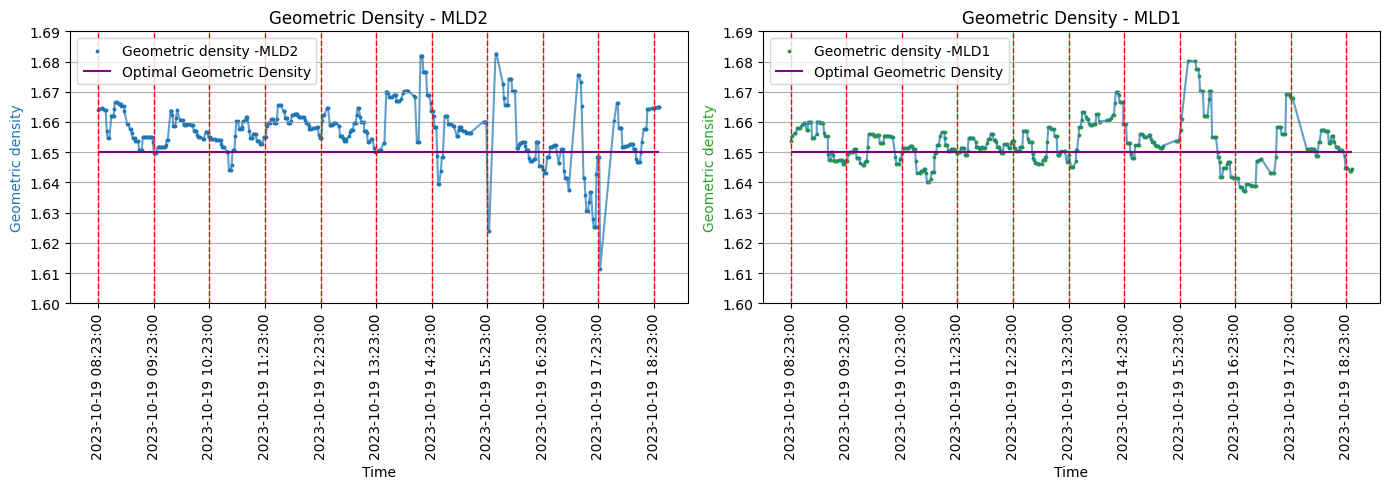

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_filtered['time'] is already a datetime or timestamp series
df_filtered['time'] = pd.to_datetime(df_filtered['time'])

# Create a figure and a 1x2 subplot grid
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot on the first subplot
ax1.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], label='Geometric density -MLD2', color='tab:blue', s=3)
ax1.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD2_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax1.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax1.set_xlabel('Time')
ax1.set_ylabel('Geometric density', color='tab:blue')
ax1.set_title('Geometric Density - MLD2')

# Plot on the second subplot
ax2.scatter(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], label='Geometric density -MLD1', color='tab:green', s=3)
ax2.plot(df_filtered['time'], df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'], color='tab:blue', linestyle='-', marker='', alpha=0.7)
threshold = 1.65  # Set your threshold value here
ax2.hlines(threshold, df_filtered['time'].min(), df_filtered['time'].max(), color='purple', linestyles='solid', label='Optimal Geometric Density')
ax2.set_xlabel('Time')
ax2.set_ylabel('Geometric density', color='tab:green')
ax2.set_title('Geometric Density - MLD1')

# Customize x-axis ticks as hourly intervals for both subplots
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')
ax1.set_xticks(hourly_intervals)
ax1.set_xticklabels(hourly_intervals, rotation=90)
ax2.set_xticks(hourly_intervals)
ax2.set_xticklabels(hourly_intervals, rotation=90)

ax1.set_ylim(1.60, 1.69)
ax2.set_ylim(1.60, 1.69)

# Add a grid to both subplots
ax1.grid(True)
ax2.grid(True)

ax1.legend()
ax2.legend()

# Add vertical lines for each hour to both subplots
for interval in hourly_intervals:
    ax1.axvline(interval, color='red', linestyle='--', linewidth=1)
    ax2.axvline(interval, color='red', linestyle='--', linewidth=1)

plt.tight_layout()  # To ensure subplots don't overlap
plt.show()


In [22]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'][mask]
    std_dev = data_subset.std()
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-1:{from_time} to {to_time}: {std_dev:.4f}')

Standard Deviation of Geometric density from mould-1:2023-10-19 08:23:00 to 2023-10-19 09:23:00: 0.0052
Standard Deviation of Geometric density from mould-1:2023-10-19 09:23:00 to 2023-10-19 10:23:00: 0.0038
Standard Deviation of Geometric density from mould-1:2023-10-19 10:23:00 to 2023-10-19 11:23:00: 0.0046
Standard Deviation of Geometric density from mould-1:2023-10-19 11:23:00 to 2023-10-19 12:23:00: 0.0019
Standard Deviation of Geometric density from mould-1:2023-10-19 12:23:00 to 2023-10-19 13:23:00: 0.0040
Standard Deviation of Geometric density from mould-1:2023-10-19 13:23:00 to 2023-10-19 14:23:00: 0.0063
Standard Deviation of Geometric density from mould-1:2023-10-19 14:23:00 to 2023-10-19 15:23:00: 0.0025
Standard Deviation of Geometric density from mould-1:2023-10-19 15:23:00 to 2023-10-19 16:23:00: 0.0137
Standard Deviation of Geometric density from mould-1:2023-10-19 16:23:00 to 2023-10-19 17:23:00: 0.0105
Standard Deviation of Geometric density from mould-1:2023-10-19 

In [ ]:
# Geometric density from mould-2


In [27]:
# Geometric density From mould-1
hourly_intervals = pd.date_range(start=df_filtered['time'].min(), end=df_filtered['time'].max(), freq='H')

hourly_std_dev = []
for i in range(len(hourly_intervals) - 1):
    start_time = hourly_intervals[i]
    end_time = hourly_intervals[i + 1]
    mask = (df_filtered['time'] >= start_time) & (df_filtered['time'] < end_time)
    data_subset = df_filtered['GAP_GAP04.PLC04.MLD1_DATA_Anode_Geometric'][mask]
    specific_number = 1.65
    data = data_subset.values
    z_scores = (data - specific_number)/np.std(data)
    from_time = start_time.strftime('%Y-%m-%d %H:%M:%S')
    to_time = end_time.strftime('%Y-%m-%d %H:%M:%S')
    hourly_std_dev.append((from_time,to_time,std_dev))
    for k, value in enumerate(data):
        print(f'Data Point {k+1}: {value} is {z_scores[i]:.3f} standard deviations from {specific_number}.')
    threshold = 0.006
    within_range = (z_scores) <= threshold
    print("Data points within 1 standard deviations from the specific number:")
    print(data[within_range])

for i, (from_time, to_time, std_dev) in enumerate(hourly_std_dev):
    print(f'Standard Deviation of Geometric density from mould-1:{from_time} to {to_time}: {std_dev:.4f}')

Data Point 1: 1.65382 is 0.745 standard deviations from 1.65.
Data Point 2: 1.6554000000000002 is 0.745 standard deviations from 1.65.
Data Point 3: 1.65619 is 0.745 standard deviations from 1.65.
Data Point 4: 1.65619 is 0.745 standard deviations from 1.65.
Data Point 5: 1.65619 is 0.745 standard deviations from 1.65.
Data Point 6: 1.65787 is 0.745 standard deviations from 1.65.
Data Point 7: 1.65787 is 0.745 standard deviations from 1.65.
Data Point 8: 1.65787 is 0.745 standard deviations from 1.65.
Data Point 9: 1.65787 is 0.745 standard deviations from 1.65.
Data Point 10: 1.6591566666666664 is 0.745 standard deviations from 1.65.
Data Point 11: 1.6598 is 0.745 standard deviations from 1.65.
Data Point 12: 1.6598 is 0.745 standard deviations from 1.65.
Data Point 13: 1.6598 is 0.745 standard deviations from 1.65.
Data Point 14: 1.6575 is 0.745 standard deviations from 1.65.
Data Point 15: 1.6575 is 0.745 standard deviations from 1.65.
Data Point 16: 1.6575 is 0.745 standard deviati

In [24]:
data_subset.values

array([1.66781   , 1.66781   , 1.66781   , 1.65119   , 1.65119   ,
       1.65119   , 1.6511625 , 1.65108   , 1.65108   , 1.65108   ,
       1.6505075 , 1.64879   , 1.64879   , 1.64879   , 1.65333   ,
       1.65333   , 1.65745   , 1.65745   , 1.65745   , 1.65745   ,
       1.65693   , 1.65693   , 1.65693   , 1.65693   , 1.65308   ,
       1.65308   , 1.653665  , 1.65542   , 1.65542   , 1.65542   ,
       1.65352   , 1.65162   , 1.65162   , 1.65162   , 1.6508    ,
       1.6508    , 1.6508    , 1.6508    , 1.64879333, 1.64478   ])